In [1]:
import yfinance as yf
from datetime import datetime, time, timedelta
import pandas as pd

In [2]:
df1 = yf.download('^BVSP', start="2003-01-01").reset_index()
df2 = yf.download('^GSPC', start="2003-01-01").reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [86]:
def get_period(complete_df, start_date, end_date):
    complete_df = complete_df.reset_index()
    df = complete_df[(complete_df['Date']>=start_date) & (complete_df['Date']<=end_date)]
    df.loc[:,'Adjusted Quote'] = 100*(df['Adj Close']/df['Adj Close'].iloc[0]-1)
    df.loc[:,'Days'] = df['Date'].apply(lambda x: (x-start_date).days)
    return df[['Date','Days', 'Adjusted Quote']]

lula1_bvsp_df = get_period(df1, datetime(2003,1,1), datetime(2007,1,1))
lula1_snp5_df = get_period(df2, datetime(2003,1,1), datetime(2007,1,1))

lula2_bvsp_df = get_period(df1, datetime(2007,1,1), datetime(2011,1,1))
lula2_snp5_df = get_period(df2, datetime(2007,1,1), datetime(2011,1,1))

bolsonaro_bvsp_df = get_period(df1, datetime(2019,1,1), datetime(2022,12,31))
bolsonaro_snp5_df = get_period(df2, datetime(2019,1,1), datetime(2022,12,31))

BVSP = [lula1_bvsp_df, lula2_bvsp_df, bolsonaro_bvsp_df]
BVSP_label = ['Lula 1 IBOV', 'Lula 2 IBOV', 'Bolsonaro IBOV']

SNP5 = [lula1_snp5_df, lula2_snp5_df, bolsonaro_snp5_df]
SNP5_label = ['Lula 1 S&P500', 'Lula 2 S&P500', 'Bolsonaro S&P500']
   

/home/giovani/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


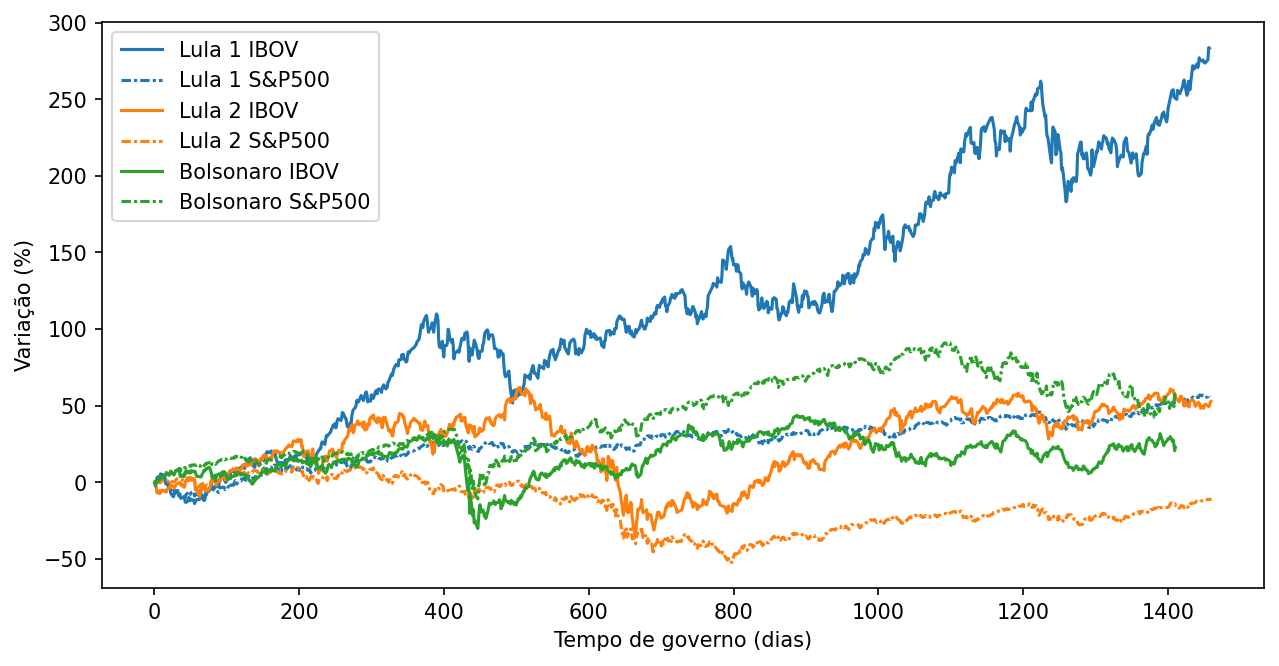

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=150, figsize=(10,5))

for i in range(len(BVSP)):
    x = BVSP[i]['Days']
    y = BVSP[i]['Adjusted Quote']
    label = BVSP_label[i]
    l, = plt.plot(x, y, label = label)
    
    x = SNP5[i]['Days']
    y = SNP5[i]['Adjusted Quote']
    label = SNP5_label[i]
    plt.plot(x, y, label = label, color = l.get_color(), ls=(0,(3,1,1,1)))

plt.legend()
plt.xlabel('Tempo de governo (dias)')
plt.ylabel('Variação (%)')
plt.show()

In [37]:
import matplotlib as mpl; print(mpl.get_cachedir())

/home/giovani/.cache/matplotlib


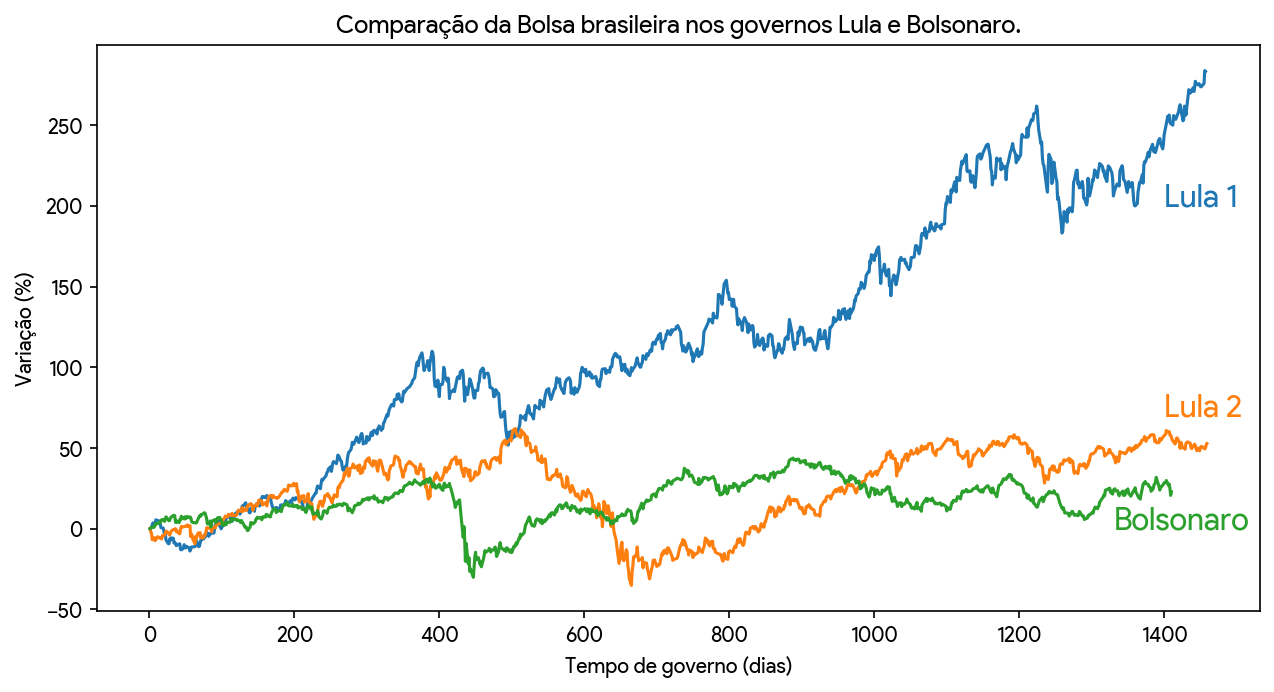

In [93]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] ='Product Sans'

fig = plt.figure(dpi=150, figsize=(10,5))

pos = [(1400,200),
       (1400,70),
       (1330,0),]
BVSP_label = ['Lula 1', 'Lula 2', 'Bolsonaro']
for i in range(len(BVSP)):
    x = BVSP[i]['Days']
    y = BVSP[i]['Adjusted Quote']
    label = BVSP_label[i]
    l, = plt.plot(x, y, label = label)
    plt.text(pos[i][0],pos[i][1],BVSP_label[i], color=l.get_color(), fontsize=15)

plt.xlabel('Tempo de governo (dias)')
plt.ylabel('Variação (%)')
plt.title('Comparação da Bolsa brasileira nos governos Lula e Bolsonaro.')
plt.savefig('ibov.png')
plt.show()

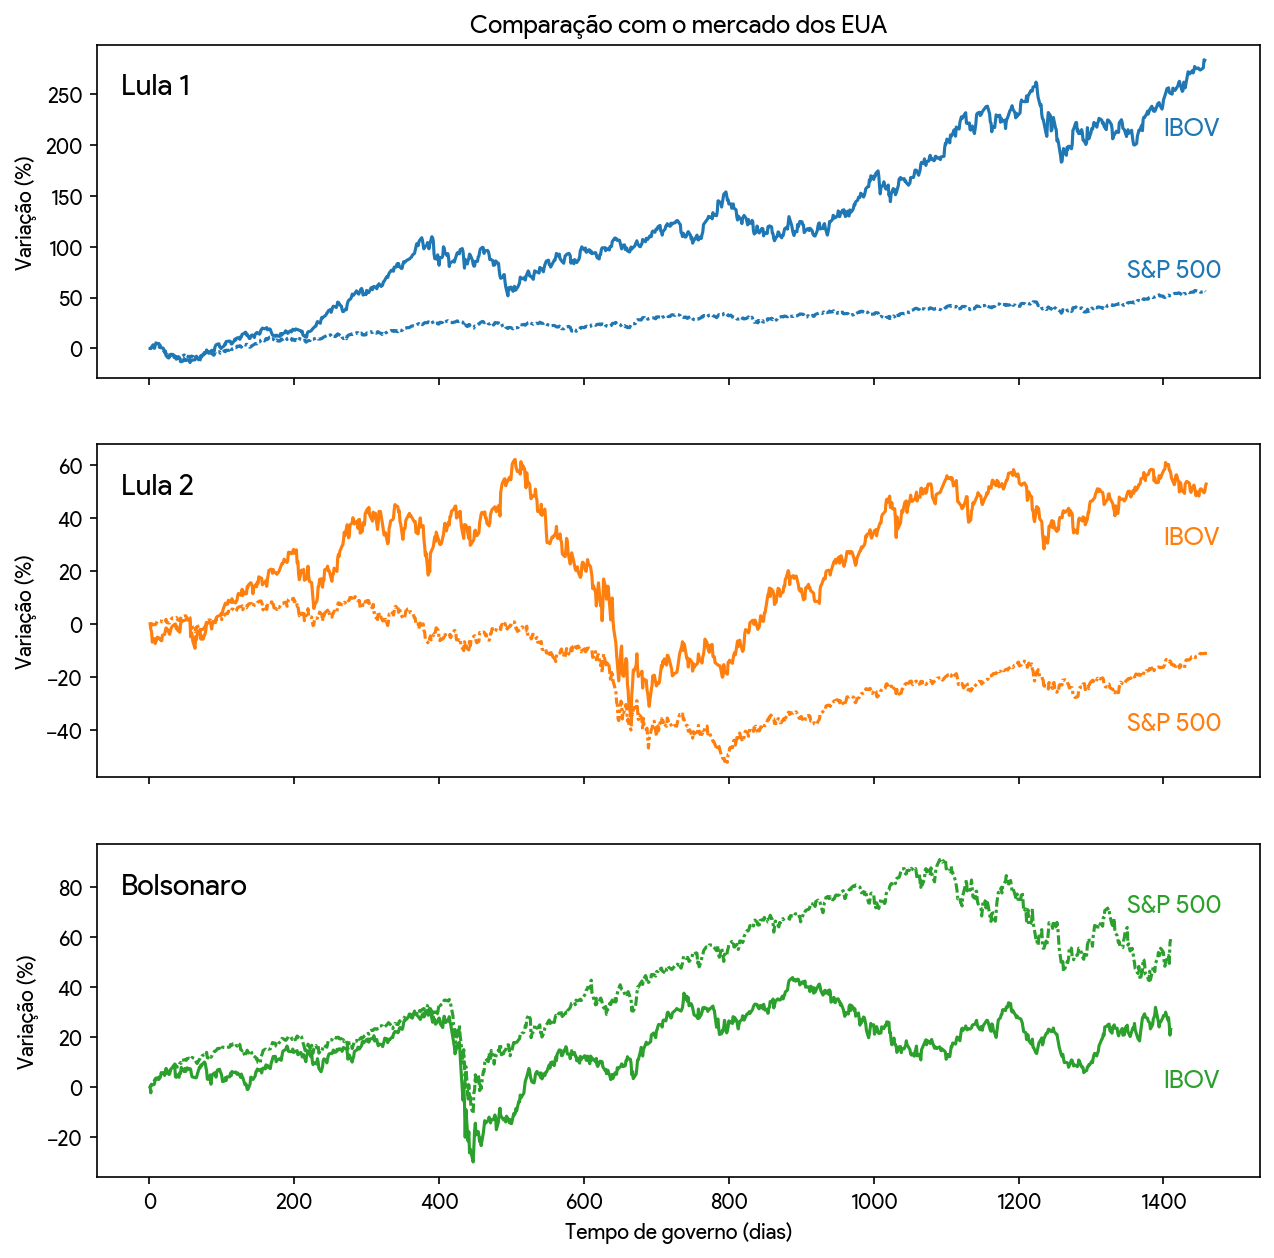

In [94]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] ='Product Sans'

fig, ax = plt.subplots(nrows=3, dpi=150, figsize=(10,10), sharex=True)

pos1 = [(1400,210),
        (1400,30),
        (1400,0),]

pos2 = [(1350,70),
        (1350,-40),
        (1350,70),]

BVSP_label = ['Lula 1', 'Lula 2', 'Bolsonaro']
for i in range(len(BVSP)):
    x = BVSP[i]['Days']
    y = BVSP[i]['Adjusted Quote']
    label = BVSP_label[i]
    l, = ax[i].plot(x, y, label = label, color=f'C{i}')
    ax[i].text(pos1[i][0],pos1[i][1],'IBOV', color=l.get_color(), fontsize=12)
    
    x = SNP5[i]['Days']
    y = SNP5[i]['Adjusted Quote']
    label = SNP5_label[i]
    ax[i].plot(x, y, label = label, color = l.get_color(), ls=(0,(3,1,1,1)))
    ax[i].text(pos2[i][0],pos2[i][1],'S&P 500', color=l.get_color(), fontsize=12)
    
    ax[i].annotate(BVSP_label[i], xy=(0.02,0.85), xycoords='axes fraction', fontsize = 14)
    ax[i].set_ylabel('Variação (%)')

plt.xlabel('Tempo de governo (dias)')
ax[0].set_title('Comparação com o mercado dos EUA')
plt.savefig('sp500.png')
plt.show()

/home/giovani/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


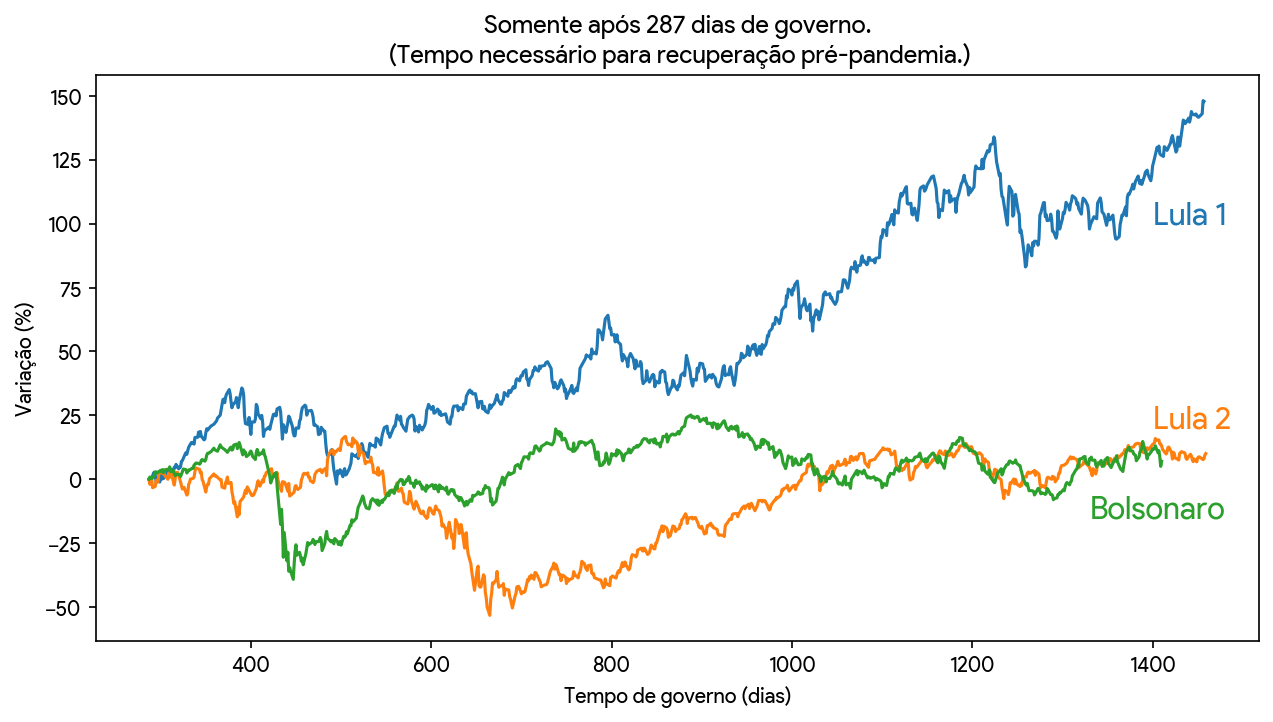

In [95]:
def get_period(complete_df, start_date, end_date):
    complete_df = complete_df.reset_index()
    df = complete_df[(complete_df['Date']>=start_date) & (complete_df['Date']<=end_date)]
    df.loc[:,'Adjusted Quote'] = 100*(df['Adj Close']/df['Adj Close'].iloc[0]-1)
    df.loc[:,'Days'] = df['Date'].apply(lambda x: (x-start_date).days)
    return df[['Date','Days', 'Adjusted Quote']]

days_to_recover = 287 #days to recover to pre pandemic level https://g1.globo.com/economia/noticia/2020/12/04/bovespa.ghtml

lula1_bvsp_df = get_period(df1, datetime(2003,1,1)+timedelta(days=days_to_recover), datetime(2007,1,1))
lula1_snp5_df = get_period(df2, datetime(2003,1,1)+timedelta(days=days_to_recover), datetime(2007,1,1))

lula2_bvsp_df = get_period(df1, datetime(2007,1,1)+timedelta(days=days_to_recover), datetime(2011,1,1))
lula2_snp5_df = get_period(df2, datetime(2007,1,1)+timedelta(days=days_to_recover), datetime(2011,1,1))

bolsonaro_bvsp_df = get_period(df1, datetime(2019,1,1)+timedelta(days=days_to_recover), datetime(2022,12,31))
bolsonaro_snp5_df = get_period(df2, datetime(2019,1,1)+timedelta(days=days_to_recover), datetime(2022,12,31))

BVSP = [lula1_bvsp_df, lula2_bvsp_df, bolsonaro_bvsp_df]
BVSP_label = ['Lula 1 IBOV', 'Lula 2 IBOV', 'Bolsonaro IBOV']

SNP5 = [lula1_snp5_df, lula2_snp5_df, bolsonaro_snp5_df]
SNP5_label = ['Lula 1 S&P500', 'Lula 2 S&P500', 'Bolsonaro S&P500']
   

plt.rcParams['font.sans-serif'] ='Product Sans'

fig = plt.figure(dpi=150, figsize=(10,5))

pos = [(1400,100),
       (1400,20),
       (1330,-15),]
BVSP_label = ['Lula 1', 'Lula 2', 'Bolsonaro']
for i in range(len(BVSP)):
    x = BVSP[i]['Days']+days_to_recover
    y = BVSP[i]['Adjusted Quote']
    label = BVSP_label[i]
    l, = plt.plot(x, y, label = label)
    plt.text(pos[i][0],pos[i][1],BVSP_label[i], color=l.get_color(), fontsize=15)

plt.xlabel('Tempo de governo (dias)')
plt.ylabel('Variação (%)')
plt.title('Somente após 287 dias de governo.\n (Tempo necessário para recuperação pré-pandemia.)')
plt.savefig('ibov_postpandemic.png')
plt.show()